# Variação total e percentual de um ativo de renda variável

## **AVISO LEGAL**

Os ativos que aparecerão neste notebook são meramente ilustrativas e de nenhuma forma representam recomendações de compra.

## Introdução

### Objetivo

A ideia neste notebook é desenvolver um código que retorne um gráfico contendo a variação total e percentual para cada ativo de renda variável dado uma carteira contendo o código do ativo, quantidade comprada, valor da unidade e a data em que a compra foi feita. 

Obs: É possível comprar um mesmo ativo em datas diferentes.

### Definições básicas e generalizações

Definimos a **variação total** de um investimento por

$$ \Delta (t) \equiv A(t) - I(t),$$

onde $A(t)$ é o valor atual do patrimônio em $t$, e $I(t)$ é o valor investido até $t$.

Além disso, definimos a **variação percentual** como

$$ \delta (t) \equiv \frac{A(t) - I(t)}{I(t)} = \frac{A(t)}{I(t)} -1.$$

Essas são as ideias básicas para cumprir o objetivo deste notebook. Feito isso, vamos começar pelo exemplo mais simples e sofisticando-o aos poucos.


#### Ex.1: $q_0$ unidades de um ativo comprados pelo preço (da unidade) $X_0$ em $t_0$

Como $I(t < t_0) = 0$, então não faz sentido fazer um gráfico para $t < t_0$. Daí, para $t > t_0$, $A(t) = q_0 X$, e $I(t) = q_0 X_0$, onde $X = X(t)$ é o preço do ativo em $t$; o que nos leva a 

$$  \Delta (t) = q_0(X - X_0), $$

$$ \delta (t) = \frac{X}{X_0} -1. $$

#### Ex.2: Um mesmo ativo comprado em 2 instantes distintos

Sejam $q_1 = q(t_1)$ e $X_1 = X(t_1)$, com $t_1 > t_0$, e $(q_0,X_0)$ como no exemplo anterior. Logo, para $t_0 < t < t_1$ a variação total continua sendo $\Delta = q_0(X - X_0)$; mas, para $t > t_1$, temos $A(t) = q_0X + q_1X = (q_0 + q_1)X$ e $I(t) = q_0X_0 + q_1X_1$; e assim, definindo a quantidade total $Q$ como

$$ Q \equiv q_0 + q_1,$$

e chamando a média ponderada do preço do ativo comprado nos instantes $t_0$ e $t_1$ de $ \overline{X} $,

$$ \overline{X} \equiv \frac{q_0 X_0 + q_1 X_1}{q_0 + q_1}, $$

segue que

$$ \Delta = (q_0 + q_1)X - (q_0X_0 + q_1X_1)  = Q(X - \overline{X}),$$

$$ \delta = \frac{(q_0 + q_1)X}{q_0 X_0 + q_1 X_1} -1 = \frac{X}{\overline{X}} -1.$$

Portanto,

$$ \Delta (t) = \begin{cases} q_0(X - X_0) & t_0 < t < t_1, \\ Q(X - \overline{X}) & t_1 < t. \end{cases}  $$

$$ \delta (t) = \begin{cases} X X_0^{-1} -1 & t_0 < t < t_1, \\ X \overline{X}^{-1} -1 & t_1 < t. \end{cases} $$

#### Ex.3: Um mesmo ativo comprado em $n$ instantes distintos

Fazendo $n$ compras de um mesmo ativo em instantes distintos, é fácil mostrar que as variações terão a mesma estrutura que no caso anterior.

Chamando a quantidade total até a k-ésima compra ($k < n$) por

$$ Q_k \equiv \sum_{i = 0}^k q_i,$$

e a média ponderada até a k-ésima compra por

$$ \overline{X}_k \equiv \frac{1}{Q_k}\sum_{i = 0}^k q_i X_i, $$

segue que a variação total é

$$ \Delta (t) = \begin{cases} q_0(X - X_0) & t_0 < t < t_1, \\ \vdots \\ Q_k(X - \overline{X}_k) & t_k < t < t_{k+1}, \\ \vdots \\ Q_{n-1}(X - \overline{X}_{n-1}) & t_{n-1} < t, \end{cases} $$

e que a variação percentual é

$$ \delta (t) = \begin{cases} X(X_0)^{-1} -1 & t_0 < t < t_1, \\ \vdots \\ X(\overline{X}_k)^{-1} -1 & t_k < t < t_{k+1}, \\ \vdots \\ X(\overline{X}_{n-1})^{-1} -1 & t_{n-1} < t. \end{cases} $$

## Arquivo de entrada

### Inserindo a carteira manualmente

Para nossas análises neste notebook, assumiremos que toda carteira deva ter 4 colunas, que são "Ativo", "Quantidade", "Compra (R$)", e "Data da Compra", onde a última coluna tem que estar no formato "dd/mm/aaaa" (mais tarde faremos a conversão para o formato americano).

Sendo assim, o código para a criação manual de uma carteira com essas características fica

In [5]:
from pandas import DataFrame

Ativos = []
Quantidades = []
Precos = []
Fechas = []

lampada = True
while lampada:
    Ativos.append(input('\nDigite o código do ativo: '))

    Quantidades.append(int(input('Digite a quantidade comprada: ')))

    Precos.append(float(input('Digite o preço de compra da unidade: ')))

    Fechas.append(input('Digite a data da compra no formato dd/mm/aaaa: '))

    char = input('\nGostaria de inserir mais uma compra na carteira? [s/n]: ')

    if char == 'n':
        lampada = False

        carteira = DataFrame({'Ativo':Ativos,
                             'Quantidade':Quantidades,
                             'Compra (R$)':Precos,
                             'Data da Compra':Fechas})

carteira


Digite o código do ativo:  VALE3
Digite a quantidade comprada:  3
Digite o preço de compra da unidade:  112.49
Digite a data da compra no formato dd/mm/aaaa:  13/05/2021

Gostaria de inserir mais uma compra na carteira? [s/n]:  n


,Ativo,Quantidade,Compra (R$),Data da Compra
0,VALE3,3,112.49,13/05/2021


Aqui colocamos as ações da Vale apenas como ilustração.

### Inserindo uma carteira pronta

Para uma carteira pronta em arquivo ```.csv```, contendo as informações mencionadas anteriormente, devemos apenas informar os caracteres de separação de colunas, decimais e o nome do arquivo. Assim, usando o arquivo ```CarteiraTeste.csv``` como exemplo de carteira para realizarmos os gráficos, temos

In [2]:
from pandas import read_csv

arquivo = input('Digite o nome do arquivo incluindo o .csv: ')

separador = input('Digite o caractere que separa as colunas: ')

dec = input('Digite o caractere de decimal: ')

carteira = read_csv(arquivo,
                    sep = separador,
                    decimal = dec)

carteira

Digite o nome do arquivo incluindo o .csv:  CarteiraTeste.csv
Digite o caractere que separa as colunas:  ;
Digite o caractere de decimal:  ,


,Ativo,Quantidade,Compra (R$),Data da Compra
0,VALE3,3,112.49,13/05/2021
1,PETR4,8,24.04,05/04/2021
2,ITUB4,2,30.80,25/06/2021
3,VALE3,4,96.09,18/03/2022
4,VALE3,15,77.08,04/01/2022
5,ITUB4,9,22.15,14/07/2022


Aqui reiteramos mais uma vez que, neste notebook, os ativos escolhidos possuem finalidade estritamente ilustrativa. Também vale ressaltar que coloquei ativos comprados mais de uma vez para implementar as fórmulas da variação total e percentual.

### Mudando o formato de data

Como faremos uma requisição API do Yahoo Finanças, devemos transformar nossa string num objeto de data, que é feito com a biblioteca ```datetime``` e usando de novo a função ```read_csv```, mas especificando os parâmetros ```parse_dates``` e ```date_parser```.

In [3]:
from datetime import datetime
from pandas import read_csv

def conversor(fecha):
    return datetime.strptime(fecha, '%d/%m/%Y')

carteira = read_csv(arquivo,
                    sep = separador,
                    decimal = dec,
                    parse_dates = ['Data da Compra'],
                    date_parser = conversor)

carteira

,Ativo,Quantidade,Compra (R$),Data da Compra
0,VALE3,3,112.49,2021-05-13
1,PETR4,8,24.04,2021-04-05
2,ITUB4,2,30.80,2021-06-25
3,VALE3,4,96.09,2022-03-18
4,VALE3,15,77.08,2022-01-04
5,ITUB4,9,22.15,2022-07-14


## Processamento dos dados

### Criação das Sub-Carteiras

A ideia desta seção é produzir DataFrame's contendo apenas um tipo de ativo através do objeto inicial ```carteira```. 

Antes disso, vamos ordenar toda a tabela pela ordem cronológica da data de compra, pois desta maneira todas as sub-carteiras estarão ordenadas nesse critério.

In [4]:
carteira.sort_values(by = 'Data da Compra',
                     inplace = True)

carteira

,Ativo,Quantidade,Compra (R$),Data da Compra
1,PETR4,8,24.04,2021-04-05
0,VALE3,3,112.49,2021-05-13
2,ITUB4,2,30.80,2021-06-25
4,VALE3,15,77.08,2022-01-04
3,VALE3,4,96.09,2022-03-18
5,ITUB4,9,22.15,2022-07-14


Agora vamos obter uma lista ordenada contendo o nome de todos os ativos que existem na carteira. Dentre as diferentes maneiras de fazer isso, vamos criar um conjunto para retirar os elementos repetidos, e depois criar uma lista em cima desse conjunto.

In [5]:
lista = list( set(carteira['Ativo']) )

lista.sort()

lista

['ITUB4', 'PETR4', 'VALE3']

Agora que temos essa lista, vamos percorrê-la de modo que em cada passo vamos criar uma sub-carteira com o método ```loc``` do pandas.

In [5]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    print(subcarteira,'\n')
    # break

   Ativo  Quantidade  Compra (R$) Data da Compra
2  ITUB4           2        30.80     2021-06-25
5  ITUB4           9        22.15     2022-07-14 

   Ativo  Quantidade  Compra (R$) Data da Compra
1  PETR4           8        24.04     2021-04-05 

   Ativo  Quantidade  Compra (R$) Data da Compra
0  VALE3           3       112.49     2021-05-13
4  VALE3          15        77.08     2022-01-04
3  VALE3           4        96.09     2022-03-18 



### Roteiro para os próximos passos

Boa parte das linhas de comando daqui em diante estarão dentro do laço ```for``` do bloco executado anteriormente, porque devemos, para cada subcarteira,

* Atualizar o valor da média ponderada a cada nova compra do mesmo ativo, o que significa criar uma nova coluna na subcarteira correspondente a $\overline{X}_k$

* Coletar a data mais antiga, que é a primeira pois os dados foram organizados de forma ascendente;

* Usar essa data para fazer uma requisição API do Yahoo Finanças e coletar o histórico do preço do ativo no período da primeira compra até hoje, onde ```hoje = datetime.date.today()```;

* Criar 2 DataFrame's com o mesmo número de linhas da tabela do histórico do preço do ativo, em que um é para os valores da Variação Total ($\Delta (t)$), e outro é para a Variação Percentual ($\delta (t)$). Obs: a cada recompra do mesmo ativo, as fórmulas que determinam essas variações mudam.

* Fazer numa mesma tela um gráfico contendo as duas variações. Para isso é necessário haver 2 eixos y, um na direita e outro na esquerda da tela.

### Médias Ponderadas

Voltando à nossa subcarteira.

In [6]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    print(subcarteira)

    break

   Ativo  Quantidade  Compra (R$) Data da Compra
2  ITUB4           2        30.80     2021-06-25
5  ITUB4           9        22.15     2022-07-14


Vamos resetar os índices para conseguir criar uma nova coluna.

In [6]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    subcarteira = subcarteira.reset_index(drop = True)
    
    print(subcarteira)
    
    break

   Ativo  Quantidade  Compra (R$) Data da Compra
0  ITUB4           2        30.80     2021-06-25
1  ITUB4           9        22.15     2022-07-14


Conforme visto na introdução, precisamos saber o valor da soma até a k-ésima compra, o que pode ser implementado com a função abaixo:

In [7]:
def Soma(subcarteira):
    lista_antiga = list(subcarteira['Quantidade'])
    
    lista_nova = []
    for indice in range(0, len(lista_antiga)):
        if indice == 0:
            lista_nova.append(lista_antiga[indice])
        else:
            lista_nova.append( lista_antiga[indice] + lista_nova[indice - 1] )

    return lista_nova

Feito isso, vamos criar a coluna da k-ésima compra.

In [8]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    subcarteira = subcarteira.reset_index(drop = True)
    
    
    subcarteira['Q_k'] = Soma(subcarteira)

      

    print(subcarteira)
    
    break

   Ativo  Quantidade  Compra (R$) Data da Compra  Q_k
0  ITUB4           2        30.80     2021-06-25    2
1  ITUB4           9        22.15     2022-07-14   11


Sendo assim, o próximo passo é criar uma coluna correspondente à k-ésima média ponderada, que pode ser realizado com a função abaixo:

In [9]:
from numpy import average

def Media(subcarteira):
    resultado = []

    valores = list(subcarteira['Compra (R$)'])
    pesos = list(subcarteira['Quantidade'])

    v_parcial = []
    p_parcial = []

    for indice in range(0, len(valores)): # poderia ser len(pesos) também
        v_parcial.append(valores[indice])
        p_parcial.append(pesos[indice])

        media = average(a = v_parcial,
                        weights = p_parcial)

        resultado.append(media)

    return resultado

Aplicando essa função dentro do laço, temos

In [10]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    subcarteira = subcarteira.reset_index(drop = True)
        
    subcarteira['Q_k'] = Soma(subcarteira)

    subcarteira['X_k'] = Media(subcarteira)
    

    print(subcarteira)
    
    break

   Ativo  Quantidade  Compra (R$) Data da Compra  Q_k        X_k
0  ITUB4           2        30.80     2021-06-25    2  30.800000
1  ITUB4           9        22.15     2022-07-14   11  23.722727


### Requisição API

Uma forma de coletar o histórico de um ativo da bolsa de valores é através da biblioteca ```pandas_datareader```. Em particular, faremos uma requisição API do Yahoo Finanças.

Começaremos criando uma função a fim de que o laço ```for``` não fique muito grande. Além disso, vale ressaltar que no site do Yahoo, as empresas estão listadas na forma 'XXXXY.SA', onde 'XXXXY' é o código listado na B3.

In [11]:
from datetime import date
from pandas_datareader import data as web

hoje = date.today()

def yahoo(ativo,tabela):
    
    fechas = list( tabela['Data da Compra'] )
    PrimeiraCompra = fechas[0]
    
    cotacoes = web.DataReader(ativo + '.SA', 
                               data_source = 'yahoo',
                               start = PrimeiraCompra,
                               end = hoje)
    return cotacoes
    

Agora vamos testar essa função no nosso laço.

In [12]:
for nome in lista:
    subcarteira = carteira.loc[ carteira['Ativo'] == nome ]
    
    subcarteira = subcarteira.reset_index(drop = True)
        
    subcarteira['Q_k'] = Soma(subcarteira)

    subcarteira['X_k'] = Media(subcarteira)
    
    df = yahoo(nome,subcarteira)
    
    #print(subcarteira, '\n')

    print(df)
    
    break
    #print(subcarteira,'\n')

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2021-06-25  32.130001  30.610001  31.980000  30.799999   38927900.0  30.011982
2021-06-28  30.900000  30.049999  30.840000  30.450001   36032900.0  29.670940
2021-06-29  30.440001  29.830000  30.260000  30.150000   30557500.0  29.378614
2021-06-30  30.270000  29.770000  30.000000  29.799999   22510200.0  29.037567
2021-07-01  29.980000  29.320000  29.790001  29.690001   20278100.0  28.944954
...               ...        ...        ...        ...          ...        ...
2022-08-05  25.129999  24.230000  24.490000  24.930000   56500800.0  24.930000
2022-08-08  25.290001  24.780001  25.080000  25.240000   40938100.0  25.240000
2022-08-09  26.280001  25.290001  26.040001  25.900000  103830600.0  25.900000
2022-08-10  26.500000  25.900000  26.160000  26.379999   48570000.0  26.379999
2022-08-11  26.780001  26.330000  26.629999  26.4200

Tomaremos o preço de fechamento como o valor base para calcular as variações. Assim, vamos excluir as demais colunas.

In [13]:
df.drop(columns = ['High', 'Low', 'Open', 'Volume', 'Adj Close'],
        inplace = True)

df

,Close
Date,
2021-06-25,30.799999
2021-06-28,30.450001
2021-06-29,30.150000
2021-06-30,29.799999
2021-07-01,29.690001
...,...
2022-08-05,24.930000
2022-08-08,25.240000
2022-08-09,25.900000


Note que executamos a linha de comando acima fora do laço para não correr o risco do nosso IP ser banido por fazer várias vezes uma requisição API. Quando terminarmos as análises, colocaremos todo o bloco de códigos desenvolvido daqui em diante de volta ao laço.

## Cálculo de $\Delta (t)$ e $\delta(t)$ propriamente dito

Com todo o processamento de dados que fizemos anteriormente, estamos agora em condições de calcular as variações total e percentual de cada ativo em nossa carteira. 

Para começar, vejamos como ficou a tabela das cotações e a subcarteira.

In [14]:
print(subcarteira, '\n')

print(df)

   Ativo  Quantidade  Compra (R$) Data da Compra  Q_k        X_k
0  ITUB4           2        30.80     2021-06-25    2  30.800000
1  ITUB4           9        22.15     2022-07-14   11  23.722727 

                Close
Date                 
2021-06-25  30.799999
2021-06-28  30.450001
2021-06-29  30.150000
2021-06-30  29.799999
2021-07-01  29.690001
...               ...
2022-08-02  23.719999
2022-08-03  23.889999
2022-08-04  24.469999
2022-08-05  24.930000
2022-08-08  25.240000

[280 rows x 1 columns]


Note que $Q_k = Q(t_k)$, assim como $\overline{X}_k = \overline{X}(t_k)$, isto é, apenas atualizamos os valores da soma das quantidades (pesos) e da média ponderada no instante $t_k$, em que uma nova compra do mesmo ativo é feita.

Tendo isso em vista, vamos criar duas novas colunas associadas a essas grandezas com a seguinte função.

In [14]:
def Copias(subcarteira, df):
    listaQ = []
    listaX = []

    q = list( subcarteira['Q_k'])
    x = list( subcarteira['X_k'])


    DataCompra = list( subcarteira['Data da Compra'])
    
    ultimoindice = len(DataCompra) - 1
    
    UltimaData = DataCompra[ ultimoindice ]

    indice = 0

    for dia in df.index:

        if dia >= UltimaData:

            listaQ.append(q[ultimoindice])
            listaX.append(x[ultimoindice])

        else:

            if dia >= DataCompra[indice] and dia < DataCompra[indice + 1]:

                listaQ.append(q[indice])
                listaX.append(x[indice])

            else:

                indice += 1
                listaQ.append(q[indice])
                listaX.append(x[indice])

    return listaQ, listaX

Aplicando essa função na nossa subcarteira e tabela de cotações,

In [20]:
listaQ, listaX = Copias(subcarteira,df)

print(listaQ)

print(listaX)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]
[30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 30.8, 

Incluindo esses dados em nosso DataFrame, 

In [15]:
# df['Q_k'] = listaQ

# df['X_k'] = listaX

df['Q_k'], df['X_k'] = Copias(subcarteira,df)

df

,Close,Q_k,X_k
Date,,,
2021-06-25,30.799999,2,30.800000
2021-06-28,30.450001,2,30.800000
2021-06-29,30.150000,2,30.800000
2021-06-30,29.799999,2,30.800000
2021-07-01,29.690001,2,30.800000
...,...,...,...
2022-08-05,24.930000,11,23.722727
2022-08-08,25.240000,11,23.722727
2022-08-09,25.900000,11,23.722727


Para verificarmos se de fato a mudança da soma das quantidades e da média ponderada foram inseridas na data correta, que no nosso caso é o dia 14/07/2022, vejamos a tabela perto desse instante.

In [17]:
df.loc['2022-07-13':'2022-07-15',:]

,Close,Q_k,X_k
Date,,,
2022-07-13,22.400000,2,30.800000
2022-07-14,22.150000,11,23.722727
2022-07-15,22.549999,11,23.722727


Como podemos ver, a função alterou o valor de $Q_k$ e $\overline{X}_k$ na data esperada. 

Feito isso, podemos calcular o valor das variações usando diretamente as fórmulas desenvolvidas na introdução.

In [16]:
df['Variação Total (R$)'] = df['Q_k'] * (df['Close'] - df['X_k'])

df['Variação Percentual'] = (df['Close'] / df['X_k']) -1

df

,Close,Q_k,X_k,Variação Total (R$),Variação Percentual
Date,,,,,
2021-06-25,30.799999,2,30.800000,-0.000002,-2.477076e-08
2021-06-28,30.450001,2,30.800000,-0.699998,-1.136361e-02
2021-06-29,30.150000,2,30.800000,-1.300001,-2.110391e-02
2021-06-30,29.799999,2,30.800000,-2.000002,-3.246756e-02
2021-07-01,29.690001,2,30.800000,-2.219999,-3.603894e-02
...,...,...,...,...,...
2022-08-05,24.930000,11,23.722727,13.280003,5.089099e-02
2022-08-08,25.240000,11,23.722727,16.689997,6.395860e-02
2022-08-09,25.900000,11,23.722727,23.949996,9.178002e-02


## Gráficos

Para fazermos gráficos de séries temporais, precisamos executar a seguinte função do pandas.

In [17]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

Agora definamos uma função que realiza os gráficos das variações.

In [19]:
from matplotlib.pyplot import subplots,show, title

def graficos(df, nome):
    
    fig, ax1 = subplots()

    ax1.set_xlabel('t')
    
    ax1.set_ylabel('Variação Total (R$)') 
    ax1.plot(df['Variação Total (R$)'], color = 'navy', label = '$\Delta(t)$') 
    ax1.legend(loc = 'lower left')
    ax1.grid(axis = 'both', linestyle = '--')
    ax1.title(nome)

    ax2 = ax1.twinx() 

    ax2.set_ylabel('Variação Percentual')
    ax2.plot(df['Variação Percentual'], color = 'green', label = '$\delta(t)$')
    ax2.legend(loc = 'lower right')

    fig.tight_layout() 
    title(nome)
    show()

Aplicando essa função em nossa tabela.

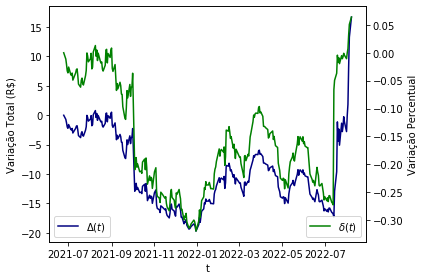

In [20]:
graficos(df, nome)

Como estamos num notebook, vamos alterar a função de modo que o tamanho do gráfico fique maior.

In [18]:
from matplotlib.pyplot import subplots,show, rcParams, title

rcParams['figure.figsize'] = (15,8)

def graficos(df, nome):
    
    fig, ax1 = subplots()

    ax1.set_xlabel('t')
    
    ax1.set_ylabel('Variação Total (R$)') 
    ax1.plot(df['Variação Total (R$)'], color = 'navy', label = '$\Delta(t)$') 
    ax1.legend(loc = 'lower left')
    ax1.grid(axis = 'both', linestyle = '--')
    # ax1.title(nome)

    ax2 = ax1.twinx() 

    ax2.set_ylabel('Variação Percentual')
    ax2.plot(df['Variação Percentual'], color = 'green', label = '$\delta(t)$')
    ax2.legend(loc = 'lower right')

    fig.tight_layout() 
    title(nome)
    
    show()

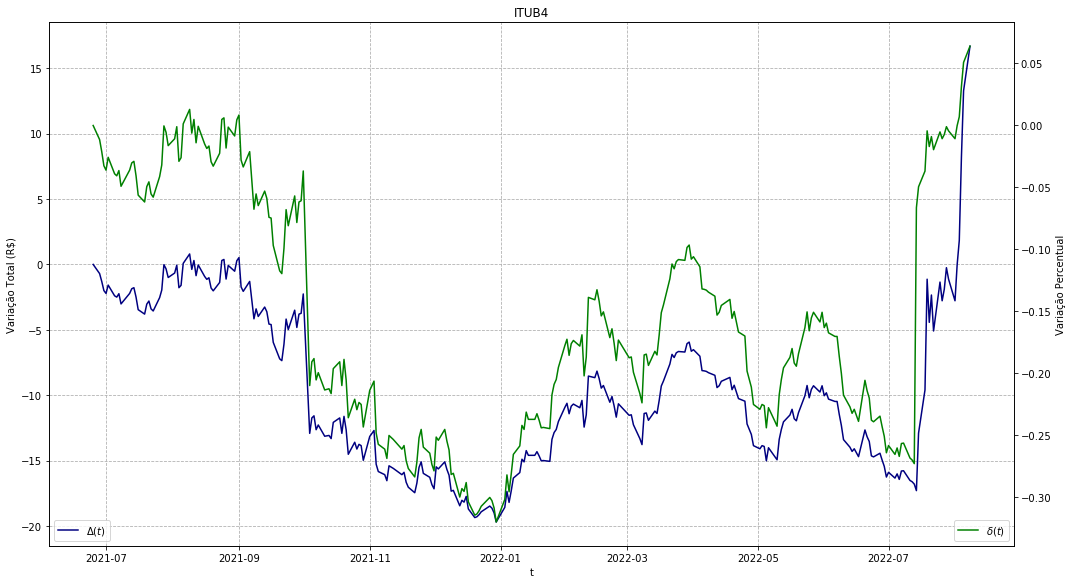

In [47]:
graficos(df, nome)

Agora vamos colocar tudo o que vimos até aqui no laço ```for``` para ver os gráficos de todos os ativos que fazem parte da caretira.

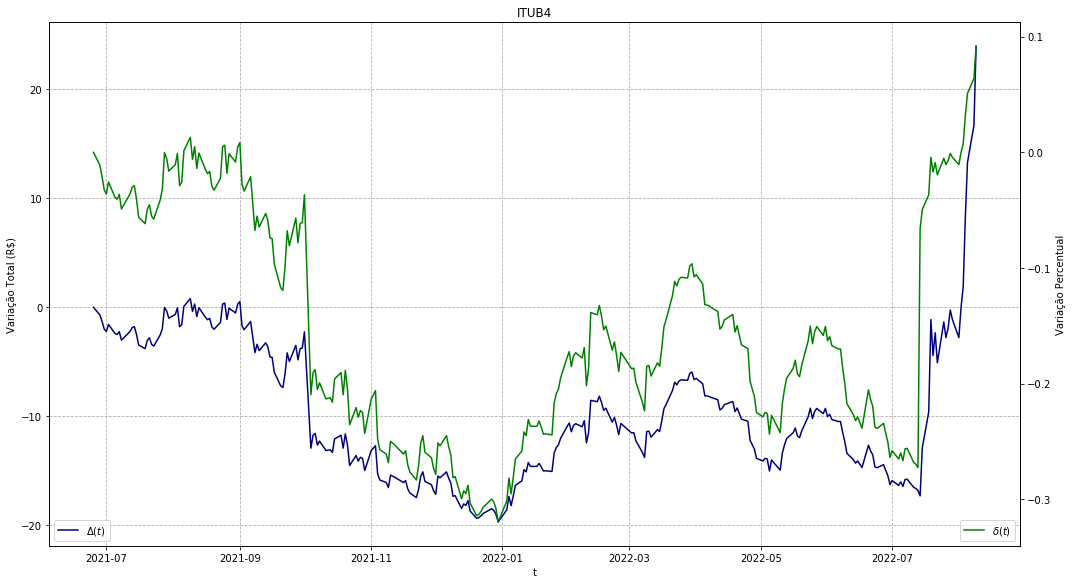

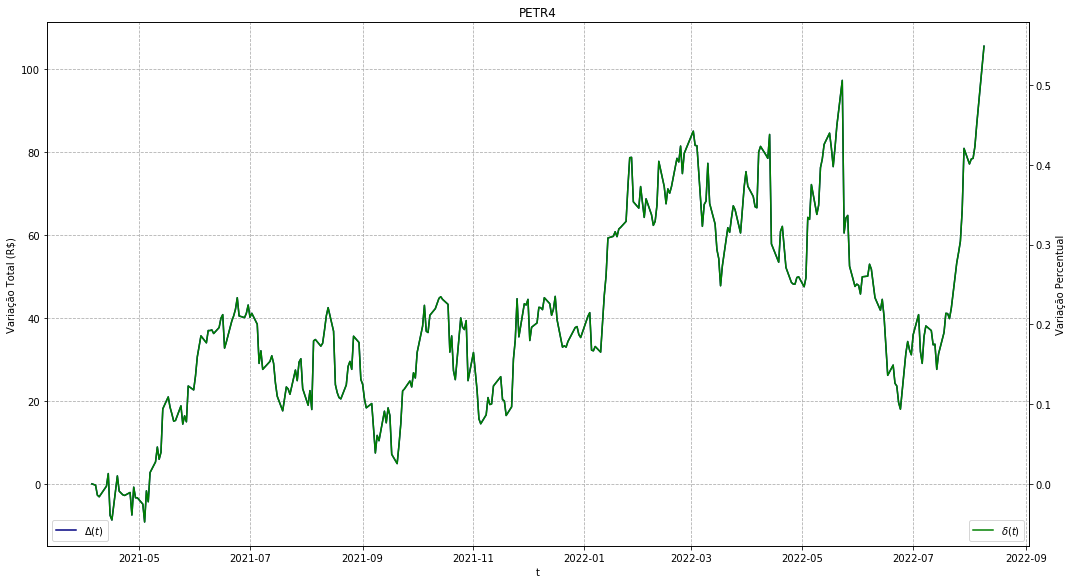

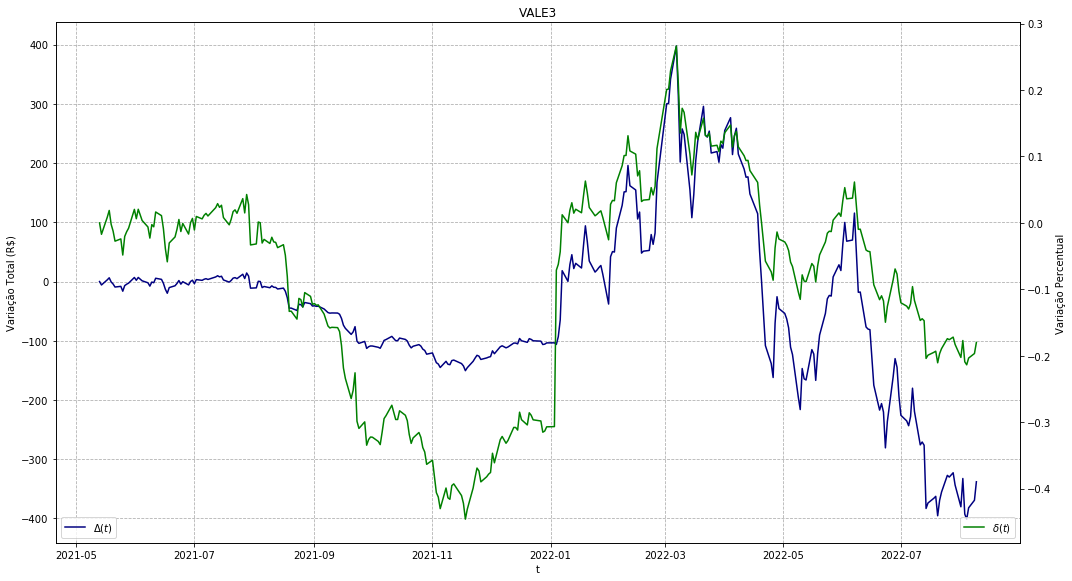

In [48]:
for nome in lista:

     subcarteira = carteira.loc[ carteira['Ativo'] == nome ]

     subcarteira = subcarteira.reset_index(drop = True, inplace = False)

     subcarteira['Q_k'] = Soma(subcarteira)

     subcarteira['X_k'] = Media(subcarteira)

     df = yahoo(nome,subcarteira)

     df.drop(columns = ['High', 'Low', 'Open', 'Volume', 'Adj Close'],
             inplace = True)

     df['Q_k'], df['X_k'] = Copias(subcarteira,df)

     df['Variação Total (R$)'] = df['Q_k'] * (df['Close'] - df['X_k'])

     df['Variação Percentual'] = (df['Close'] / df['X_k']) -1

     graficos(df,nome)

Note que o gráfico da Petrobrás só possui só uma cor. Isso ocorre pois, nessa carteira fictícia, houve apenas uma compra desse ativo, e assim o gráfico da variação total coincide com o gráfico da variação percentual.

## Extra: Cálculo das variações da carteira como um todo

Aqui vamos calcular a variação total e percentual da carteira como se esta fosse um único ativo. Com isso, será possível comparar a rentabilidade da carteira com outros parâmetros, como o IBOV, inflação, BTC, dentre outros.

Vale ressaltar que faremos esses cálculos a partir da última data de compra -que chamaremos de $\tau$- para simplificar as fórmulas. 

Vejamos antes a carteira mais uma vez:

In [21]:
carteira

,Ativo,Quantidade,Compra (R$),Data da Compra
1,PETR4,8,24.04,2021-04-05
0,VALE3,3,112.49,2021-05-13
2,ITUB4,2,30.80,2021-06-25
4,VALE3,15,77.08,2022-01-04
3,VALE3,4,96.09,2022-03-18
5,ITUB4,9,22.15,2022-07-14


A última data da compra é no dia 14/07/2022. Para coletar essa data, fazemos

In [19]:
UltimaFecha = carteira.iloc[-1]['Data da Compra']

UltimaFecha

Timestamp('2022-07-14 00:00:00')

Agora voltemos à nossa subcarteira

In [20]:
for nome in lista:

     subcarteira = carteira.loc[ carteira['Ativo'] == nome ]

     subcarteira = subcarteira.reset_index(drop = True, inplace = False)

     subcarteira['Q_k'] = Soma(subcarteira)

     subcarteira['X_k'] = Media(subcarteira)
    
     print(subcarteira)

     break

   Ativo  Quantidade  Compra (R$) Data da Compra  Q_k        X_k
0  ITUB4           2        30.80     2021-06-25    2  30.800000
1  ITUB4           9        22.15     2022-07-14   11  23.722727


A vantagem de trabalhar com instantes depois de $\tau$ é que as grandezas $Q_k$, $\overline{X}_k$, e, consequentemente, $I(t)$ serão constantes. Deste modo, dentro do laço for precisamos guardar os valores da última linha dessas colunas. Além disso, como 

$$ I(t>=\tau) = \sum_i q^x_i X_i + \sum_i q^y_i Y_i + \sum_i q^z_i Z_i + \dots, $$

então convém criar uma nova culuna relacionada ao valor investido até o momento, para coletar a célula da última linha.

In [21]:
for nome in lista:

     subcarteira = carteira.loc[ carteira['Ativo'] == nome ]

     subcarteira = subcarteira.reset_index(drop = True, inplace = False)

     subcarteira['Q_k'] = Soma(subcarteira)

     subcarteira['X_k'] = Media(subcarteira)
    
     subcarteira['Valor Investido (R$)'] = subcarteira['Quantidade'] * subcarteira['Compra (R$)']
    
     #print(subcarteira)

     break

subcarteira

,Ativo,Quantidade,Compra (R$),Data da Compra,Q_k,X_k,Valor Investido (R$)
0,ITUB4,2,30.80,2021-06-25,2,30.800000,61.60
1,ITUB4,9,22.15,2022-07-14,11,23.722727,199.35


Feito isso, criemos uma lista que armazene a soma dos valores investido para cada ativo da carteira.

In [22]:
ValoresInvestidos = []

for nome in lista:

     subcarteira = carteira.loc[ carteira['Ativo'] == nome ]

     subcarteira = subcarteira.reset_index(drop = True, inplace = False)

     subcarteira['Q_k'] = Soma(subcarteira)

     subcarteira['X_k'] = Media(subcarteira)
    
     subcarteira['Valor Investido (R$)'] = subcarteira['Quantidade'] * subcarteira['Compra (R$)']
    
     ValoresInvestidos.append(sum(subcarteira['Valor Investido (R$)']))
     
     #print(subcarteira)

     break

ValoresInvestidos

[260.95]

A soma de todos os elementos dessa lista será o denomindador de $\delta (t>= \tau) $.

Deste modo, vejamos como fica a variação de um ativo nesse intervalo de tempo.

In [23]:
df.loc[UltimaFecha:]['Variação Total (R$)']

Date
2022-07-14   -17.300004
2022-07-15   -12.900008
2022-07-18    -9.599996
2022-07-19    -1.129991
2022-07-20    -4.430003
2022-07-21    -2.339997
2022-07-22    -5.089997
2022-07-25    -1.349996
2022-07-26    -2.780008
2022-07-27    -1.900008
2022-07-28    -0.249992
2022-07-29    -1.129991
2022-08-01    -2.780008
2022-08-02    -0.030008
2022-08-03     1.839993
2022-08-04     8.219992
2022-08-05    13.280003
2022-08-08    16.689997
2022-08-09    23.949996
2022-08-10    29.229991
2022-08-11    29.670001
Name: Variação Total (R$), dtype: float64

Para calcular a variação total da carteira, podemos armazenar esses valores no laço for para convertê-los em colunas de uma nova tabela e depois somá-los linha a linha criando uma nova coluna, ou podemos criar inicialmente um array nulo de dimensão "última linha de df" - ```UltimaFecha```, e somando a cada passo dentro do for os valores da variação. 

Usaremos a segunda metodologia.

Fazendo alguns testes antes,

In [24]:
df.loc[UltimaFecha:].index

DatetimeIndex(['2022-07-14', '2022-07-15', '2022-07-18', '2022-07-19',
               '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-25',
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
               '2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
               '2022-08-05', '2022-08-08', '2022-08-09', '2022-08-10',
               '2022-08-11'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [25]:
len(df.loc[UltimaFecha:].index)

21

In [26]:
from pandas import DataFrame

dic = {'Datas':df.loc[UltimaFecha:].index}

# ddx = DataFrame(df.loc[UltimaFecha:].index)

ddx = DataFrame(dic)

ddx

,Datas
0,2022-07-14
1,2022-07-15
2,2022-07-18
3,2022-07-19
4,2022-07-20
5,2022-07-21
6,2022-07-22
7,2022-07-25
8,2022-07-26
9,2022-07-27


Criando esse array nulo antes do laço.

In [29]:
from numpy import zeros, array

ValoresInvestidos = []

ColunaFinal = zeros(len(df.loc[UltimaFecha:].index))

for nome in lista:

     subcarteira = carteira.loc[ carteira['Ativo'] == nome ]

     subcarteira = subcarteira.reset_index(drop = True, inplace = False)

     subcarteira['Q_k'] = Soma(subcarteira)

     subcarteira['X_k'] = Media(subcarteira)

     df = yahoo(nome,subcarteira)

     df.drop(columns = ['High', 'Low', 'Open', 'Volume', 'Adj Close'],
             inplace = True)

     df['Q_k'], df['X_k'] = Copias(subcarteira,df)

     df['Variação Total (R$)'] = df['Q_k'] * (df['Close'] - df['X_k'])

     df['Variação Percentual'] = (df['Close'] / df['X_k']) -1
        
     #----------------------------------------------------------------------------------------------
        
     subcarteira['Valor Investido (R$)'] = subcarteira['Quantidade'] * subcarteira['Compra (R$)']
    
     ValoresInvestidos.append(sum(subcarteira['Valor Investido (R$)']))
        
     #print(array(df.loc[UltimaFecha:]['Variação Total (R$)']))   
     ColunaFinal = ColunaFinal + array(df.loc[UltimaFecha:]['Variação Total (R$)'])
    
     #break
        
ColunaFinal
     

[-17.3000042  -12.90000839  -9.5999958   -1.12999077  -4.43000336
  -2.33999748  -5.08999748  -1.3499958   -2.78000755  -1.90000839
  -0.24999161  -1.12999077  -2.78000755  -0.03000755   1.83999329
   8.21999245  13.28000336  16.68999748  23.9499958   29.22999077
  29.67000084]
[ 27.59999817  31.35999268  36.48000305  41.12000244  41.04000061
  39.84000366  42.31999939  53.2800061   55.76000183  58.48000305
  66.00000732  80.88001221  77.12000244  78.32001465  78.47998779
  81.35999268  86.63999146 100.72000854 105.51999634 104.56000488
  97.68      ]
[-383.13006714 -373.88993958 -365.96992615 -362.67006042 -395.45001343
 -369.49000671 -355.41002014 -327.250047   -330.10998657 -326.59007385
 -322.84994629 -343.53       -380.26995972 -332.53       -392.59007385
 -401.17006042 -382.03       -369.26995972 -338.03       -336.92993286
 -283.250047  ]


array([-372.83007317, -355.42995529, -339.0899189 , -322.68004875,
       -358.84001617, -331.99000053, -318.18001823, -275.3200367 ,
       -277.12999229, -270.01007919, -257.09993057, -263.77997856,
       -305.92996483, -254.2399929 , -312.27009277, -311.5900753 ,
       -282.11000519, -251.85995369, -208.56000786, -203.13993721,
       -155.90004616])

Agora que temos a coluna final contendo a evolução temporal da Variação (total) da Carteira como um todo, criemos uma tabela contendo tanto $\Delta$ quanto $\delta$. Para a coluna de $\delta$, precisamos antes obter o valor total investido, que é simplesmente a soma de todos os valores da lista ```ValoresInvestidos``` .

In [30]:
TotalInvestido = sum(ValoresInvestidos)

TotalInvestido

2331.3

In [41]:
from pandas import DataFrame

# DICIONARIO = {'Datas':df.loc[UltimaFecha:].index,
#               'Variação Total (R$)':ColunaFinal}

DICIONARIO = {'Variação Total (R$)':ColunaFinal}

novatabela = DataFrame(data = DICIONARIO,
                       index = df.loc[UltimaFecha:].index)

novatabela

,Variação Total (R$)
Date,
2022-07-14,-372.830073
2022-07-15,-355.429955
2022-07-18,-339.089919
2022-07-19,-322.680049
2022-07-20,-358.840016
2022-07-21,-331.990001
2022-07-22,-318.180018
2022-07-25,-275.320037
2022-07-26,-277.129992


Para a variação percentual, basta dividir pelo total investido.

In [42]:
novatabela['Variação Percentual'] = novatabela['Variação Total (R$)']/TotalInvestido

# novatabela.set_index(list(novatabela['Datas']),
#                      drop = True, inplace = True)

novatabela

,Variação Total (R$),Variação Percentual
Date,,
2022-07-14,-372.830073,-0.159924
2022-07-15,-355.429955,-0.152460
2022-07-18,-339.089919,-0.145451
2022-07-19,-322.680049,-0.138412
2022-07-20,-358.840016,-0.153923
2022-07-21,-331.990001,-0.142406
2022-07-22,-318.180018,-0.136482
2022-07-25,-275.320037,-0.118097
2022-07-26,-277.129992,-0.118874


Note que podemos reutilizar a função que realiza os gráficos pois o nome das colunas permanece igual.

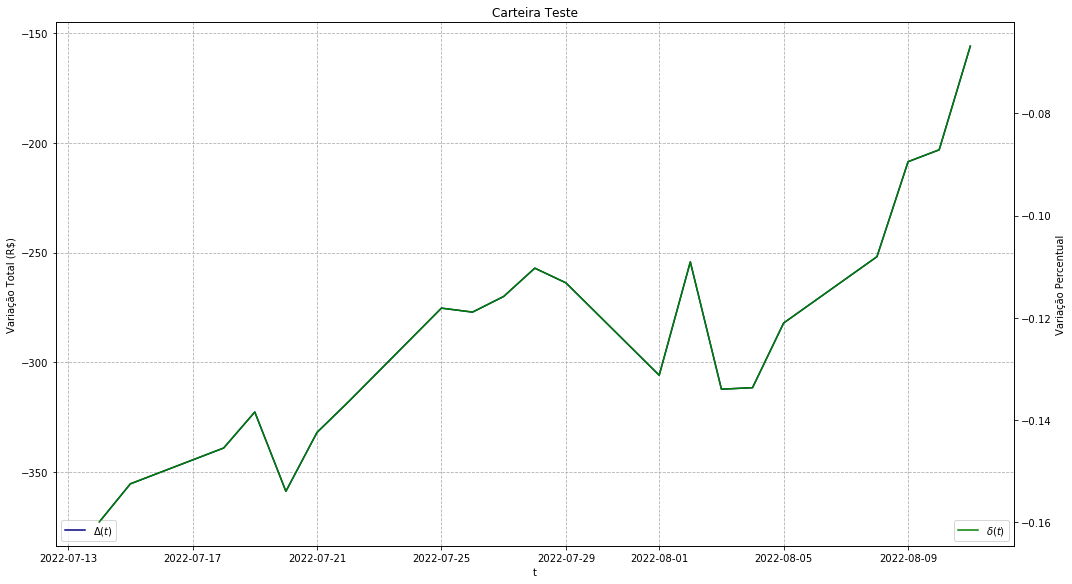

In [43]:
graficos(novatabela,'Carteira Teste')

Com a variação percentual da carteira, podemos comparar o rendimento da carteira com outros índices.